In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import math
import pandas as pd
import numpy as np

# Question 1:

Did blast run where query sequence was input. The program selection was changed to somewhat similar sequences (blastn). The max target sequences was changed to 1000 and the expected threshold was changed to 0.0001. Downloaded complete sequences and came as file seqdump.txt.

# Question 2:

In command line:
> transeq -sequence seqdump.txt -outseq prot_fmt.txt

> mafft prot_fmt.txt > prot_aln.fa


# Question 3/4:

The scription done for 3 and 4 was done into a file called gap_nuc_add.py which will write a ratio file. There are two functions inside, the first will create the aligned DNA sequences (question 3) and the next will calculation dN and dS write them out below to dS or dN files. The run command for the file is below and then I read in the dN and dS files and go from there to create the plot and do statistical analysis.

In [2]:
%run gap_nuc_add.py prot_aln.fa seqdump.txt

In [3]:
dN = np.genfromtxt("dN.txt")
dS = np.genfromtxt("dS.txt")
D = dN - dS
D

array([124.,  37., 193., ..., 138., 391., 342.])

In [4]:
# create dictionary of log2 of ratio and zscores, and convert to dataframe (easier to plot)
# add index to df again easier to plot
dict = {"log2-ratio": np.log2(dN/dS), 
        "zscore": stats.zscore(D)}
df = pd.DataFrame(dict)
df['index'] = range(len(df))
df

,log2-ratio,zscore,index
0,2.152003,-0.751256,0
1,1.943416,-1.109010,1
2,4.836501,-0.467520,2
3,6.727920,-0.397614,3
4,4.405992,-0.430511,4
...,...,...,...
3141,0.000000,-1.261159,3141
3142,2.643856,-1.002095,3142
3143,4.837943,-0.693687,3143
3144,4.854423,0.346679,3144


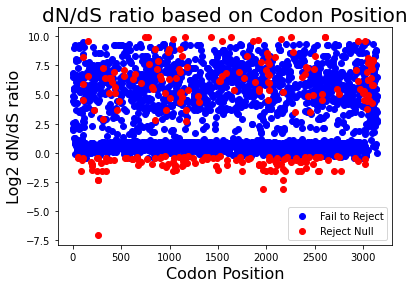

In [5]:
#plot codon position by log2 or dN/dS ratio
fig, ax = plt.subplots()
ax.scatter(x = df["index"][(df['zscore'] > -1.65) & (df['zscore'] < 1.65)], y = df['log2-ratio'][(df['zscore'] > -1.65) & (df['zscore'] < 1.65)], color = "blue", label = "Fail to Reject")
ax.scatter(x = df["index"][(df["zscore"] <= -1.65) | (df["zscore"] >= 1.65)], y = df['log2-ratio'][(df["zscore"] <= -1.65) | (df["zscore"] >= 1.65)], color = "red", label = "Reject Null")
ax.set_title('dN/dS ratio based on Codon Position', fontsize=20)
ax.set_xlabel('Codon Position', fontsize=16)
ax.set_ylabel('Log2 dN/dS ratio', fontsize=16)
plt.legend()